# Is about SQL EDA of the Brazillian E-Commerce Dataset


DataBase Schema

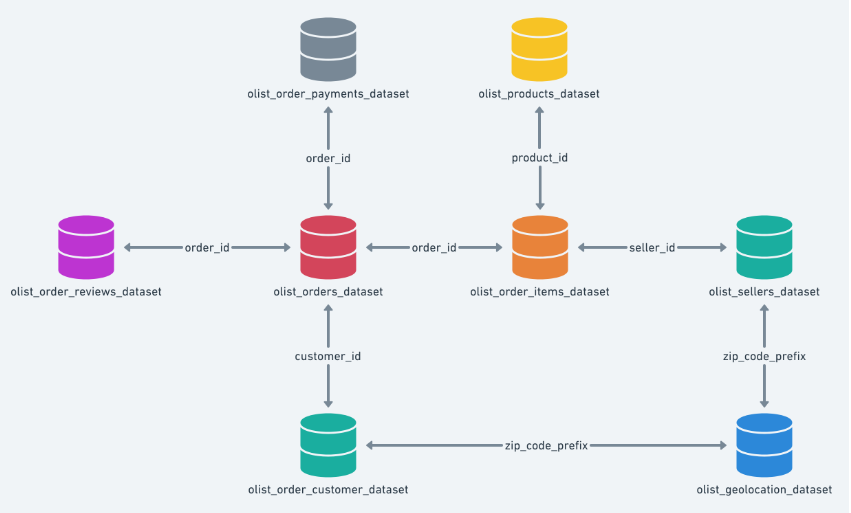

In [2]:
## Import Liberaries
import numpy as np
import pandas as pd

In [44]:
## Read the files

df_olist_customers = pd.read_csv('olist_customers_dataset.csv')
df_olist_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_olist_products = pd.read_csv('olist_products_dataset.csv')
df_olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
df_olist_orders = pd.read_csv('olist_orders_dataset.csv')
df_olist_order_payments= pd.read_csv('olist_order_payments_dataset.csv')

In [10]:
df_olist_customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [ ]:
## print the columns of all dataframes 

In [14]:
## 1. df_olist_customers.columns 
print('The columns of olist_customers are: ' ,df_olist_customers.columns)

The columns of olist_customers are :  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


In [16]:
## 2. df_olist_sellers
print('The columns of olist_sellers are:', df_olist_sellers.columns)

The columns of olist_sellers are : Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


In [17]:
## 3. df_olist_order_reviews 
print('The columns of df_olist_order_reviews are:', df_olist_order_reviews.columns)

The columns of df_olist_order_reviews are : Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


In [18]:
## 4. df_olist_order_items
print('The columns of df_olist_order_items are:', df_olist_order_items.columns)

The columns of df_olist_order_items are: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [19]:
## 5. df_olist_products 
print('The columns of df_olist_products are:', df_olist_products.columns)

The columns of df_olist_products are: Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


In [21]:
## 6. df_olist_geolocation
print('The columns of df_olist_geolocation are:', df_olist_geolocation.columns)

The columns of df_olist_geolocation are: Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


In [45]:
## 7. df_product_category_name_translation
print('The columns of product_category_name_translation are :-  ',df_product_category_name_translation.columns)


The columns of product_category_name_translation are :-   Index(['product_category_name', 'product_category_name_english'], dtype='object')


In [37]:
## 8.df_olist_orders.columns
print('The columns of olist_orders_dataset are :-  ',df_olist_orders.columns)

The columns of olist_orders_dataset are :-   Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [36]:
## 9.df_olist_order_payments.columns 
print('The columns of olist_order_payments are :-  ',df_olist_order_payments.columns)

The columns of olist_order_payments are :-   Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


In [48]:
# import sqlalchemy and create a sqlite engine
## Creating a connection to a SQLite database is useful when you need to interact with a database. 
## perform queries, insert data, update records, and other operations. 
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

# export the dataframe as a table 'playstore' to the sqlite engine
df_olist_customers.to_sql("olist_customers", con =engine)
df_olist_sellers.to_sql("olist_sellers", con =engine)
df_olist_order_reviews.to_sql("olist_order_reviews", con =engine)
df_olist_order_items.to_sql("olist_order_items", con =engine)
df_olist_products.to_sql("olist_products_dataset", con =engine)
df_olist_geolocation.to_sql("olist_geolocation", con =engine)
df_product_category_name_translation.to_sql("product_category_name_translation", con =engine)
df_olist_orders.to_sql("olist_orders", con =engine)
df_olist_order_payments.to_sql("olist_order_payments", con =engine)
df_olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [52]:
## Test the code by select the complete table

sql='''

Select * from olist_customers
limit 5 

'''

df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# Explanation of the code below: 
The subquery is a nested query that calculates two columns: review_score_5 and review_score_total.

The review_score_5 column is calculated using the CASE statement. If the review_score is equal to 5 and the current order_id is different from the previous order_id (using the LAG function), the value 1 is assigned. Otherwise, the value 0 is assigned. This column is used to count the orders that have a review score of 5.

The review_score_total column is also calculated using the CASE statement. If the review_score is less than 6, the value 1 is assigned. Otherwise, the value 0 is assigned. This column is used to count all orders, regardless of the review score.

In [61]:
# This information can be valuable for evaluating the quality of service or 
# product provided by the company during that specific month and to assess overall customer satisfaction.

## Query 1:-  count and % of Orders purchased in Jan18 with 5 Review score
sql='''

SELECT
    SUM(b.review_score_5) + 1 AS orders_with_review_5,
    SUM(b.review_score_total) AS total_orders,
    100 * (ROUND(ROUND(SUM(b.review_score_5), 4) / ROUND(SUM(b.review_score_total), 4), 4)) AS percentage
FROM
    (
    SELECT
        CASE WHEN a.review_score = 5 AND a.order_id != LAG(order_id) OVER (ORDER BY a.customer_id, a.order_id,
        a.review_id ASC) THEN 1 ELSE 0 END AS review_score_5,
        CASE WHEN a.review_score < 6 THEN 1 ELSE 0 END AS review_score_total
    FROM
        (
        SELECT
            o.customer_id,
            o.order_id,
            r.review_id,
            r.review_score,
            o.order_delivered_customer_date
        FROM
            olist_orders o
            JOIN olist_order_reviews r ON o.order_id = r.order_id
        WHERE
            o.order_delivered_customer_date BETWEEN '2018-01-01 00:00:00' AND '2018-01-30 00:00:00'
        GROUP BY
            o.customer_id, o.order_id, r.review_id
        ORDER BY
            o.customer_id, o.order_id, r.review_id ASC
        ) a
    GROUP BY
        a.customer_id, a.order_id, a.review_id
    ORDER BY
        a.customer_id, a.order_id, a.review_id ASC
    ) b;


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,orders_with_review_5,total_orders,percentage
0,3294,5939,55.45


This SQL query calculates the customer purchase trend year-on-year. It counts the number of orders made by customers in each month for the years 2016, 2017, and 2018. The result is displayed as a table with columns for each month (represented as month numbers and month names) and the corresponding counts for each year.

Let's break down the query step by step:

The innermost subquery (aliased as 'a') extracts the relevant information from the 'olist_orders' table, including customer_id, order_id, order_delivered_customer_date, order_status, year (extracted using strftime with format '%Y'), and month (extracted using strftime with format '%m'). It filters the data for only 'delivered' orders with a non-null 'order_delivered_customer_date' and groups it by customer_id, order_id, and order_delivered_customer_date. The result is sorted by 'order_delivered_customer_date' in ascending order.

The outer query groups the data from the subquery by month. It also uses a CASE statement to create separate columns for the counts of orders in each year (2016, 2017, and 2018). The SUM function is used with CASE statements to count the number of orders in each year based on the 'Year' column.

The result of the outer query is ordered by month number ('month_no') in ascending order.

The final result is obtained by executing the SQL query and reading it into a pandas DataFrame named 'df_sql', which contains the monthly counts for each year. The DataFrame is then displayed with the first 12 rows representing the 12 months.

The output table will have the following columns:

'month_no': The month number (1 to 12).
'month': The month name (Jan, Feb, ..., Dec).
'Year2016': The count of orders made in that month in the year 2016.
'Year2017': The count of orders made in that month in the year 2017.
'Year2018': The count of orders made in that month in the year 2018.
The table shows how customer purchase behavior has evolved over the years, providing insights into monthly purchase trends year-on-year.


In [59]:
## Query 2:-  Customer purchase trend Year-on-Year
sql='''

SELECT
    month AS month_no,
    CASE 
        WHEN a.month = '01' THEN 'Jan' 
        WHEN a.month = '02' THEN 'Feb'
        WHEN a.month = '03' THEN 'Mar'
        WHEN a.month = '04' THEN 'Apr'
        WHEN a.month = '05' THEN 'May'
        WHEN a.month = '06' THEN 'Jun'
        WHEN a.month = '07' THEN 'Jul'
        WHEN a.month = '08' THEN 'Aug'
        WHEN a.month = '09' THEN 'Sep'
        WHEN a.month = '10' THEN 'Oct'
        WHEN a.month = '11' THEN 'Nov'
        WHEN a.month = '12' THEN 'Dec'
        ELSE 0 
    END AS month,
    SUM(CASE WHEN a.year = '2016' THEN 1 ELSE 0 END) AS Year2016,
    SUM(CASE WHEN a.year = '2017' THEN 1 ELSE 0 END) AS Year2017,
    SUM(CASE WHEN a.year = '2018' THEN 1 ELSE 0 END) AS Year2018
FROM
    (SELECT 
        customer_id,
        order_id,
        order_delivered_customer_date,
        order_status,
        STRFTIME('%Y', order_delivered_customer_date) AS Year,
        STRFTIME('%m', order_delivered_customer_date) AS Month
    FROM
        olist_orders
    WHERE
        order_status = 'delivered' AND order_delivered_customer_date IS NOT NULL
    GROUP BY
        customer_id, order_id, order_delivered_customer_date
    ORDER BY
        order_delivered_customer_date ASC) a
GROUP BY
    month
ORDER BY
    month_no ASC

''';
    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(12)


,month_no,month,Year2016,Year2017,Year2018
0,01,Jan,0,283,6597
1,02,Feb,0,1351,5850
2,03,Mar,0,2382,6824
3,04,Apr,0,1849,7850
4,05,May,0,3751,7111
5,06,Jun,0,3223,6829
6,07,Jul,0,3455,5839
7,08,Aug,0,4302,8314
8,09,Sep,0,3965,56
9,10,Oct,205,4494,3


The purpose of this query is to analyze the delivery success rates across different states for each year. By calculating the delivery success rate and failure rate, the query provides insights into the effectiveness of the delivery process and allows for the identification of any issues or trends.

In [58]:
## Query 3:-  ## Delivery Success Rate across state

sql='''

SELECT
    c.customer_state AS customer_state,
    STRFTIME('%Y', o.order_delivered_customer_date) AS Year,
    COUNT(DISTINCT c.customer_city) AS Total_Delivered_Cities,
    COUNT(c.customer_unique_id) AS Total_Customers,
    SUM(CASE WHEN o.order_status = 'delivered' THEN 1 ELSE 0 END) AS Delivered,
    SUM(CASE WHEN o.order_status != 'delivered' THEN 1 ELSE 0 END) AS Not_Delivered,
    100 - 100 * ROUND(ROUND(SUM(CASE WHEN o.order_status != 'delivered' THEN 1 ELSE 0 END), 4) / ROUND(COUNT(o.order_status), 4), 4) AS Delivery_Success_Rate,
    100 * ROUND(ROUND(SUM(CASE WHEN o.order_status != 'delivered' THEN 1 ELSE 0 END), 4) / ROUND(COUNT(o.order_status), 4), 4) AS Delivery_Failure_Rate
FROM
    olist_customers c
    JOIN olist_orders o ON o.customer_id = c.customer_id
GROUP BY
    c.customer_state, STRFTIME('%Y', o.order_delivered_customer_date)
ORDER BY
    customer_state, Year ASC


''';
    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(100)

,customer_state,Year,Total_Delivered_Cities,Total_Customers,Delivered,Not_Delivered,Delivery_Success_Rate,Delivery_Failure_Rate
0,AC,None,1,1,0,1,0.00,100.00
1,AC,2017,7,48,48,0,100.00,0.00
2,AC,2018,4,32,32,0,100.00,0.00
3,AL,None,6,16,0,16,0.00,100.00
4,AL,2016,1,1,1,0,100.00,0.00
...,...,...,...,...,...,...,...,...
95,SP,None,202,1251,7,1244,0.56,99.44
96,SP,2016,48,96,95,1,98.96,1.04
97,SP,2017,527,16533,16533,0,100.00,0.00
98,SP,2018,564,23866,23866,0,100.00,0.00
